In [1]:
import numpy as np
import pandas as pd
import csv

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
data=pd.read_excel('/content/drive/My Drive/data/데이터거래소_스포츠및레저업종.xlsx')

In [3]:
data

,기준월,마케팅업종세세분류명,성별,연령대_10,연령대_05,전년대비매출액비중(전년=100)
0,1,골프실내연습장,남,10대이하,10대이하,329.155313
1,1,골프실내연습장,남,20대,20-24세,124.774084
2,1,골프실내연습장,남,20대,25-29세,114.546336
3,1,골프실내연습장,남,30대,30-34세,122.486969
4,1,골프실내연습장,남,30대,35-39세,108.206543
...,...,...,...,...,...,...
3150,6,헬스클럽,여,50대,55-59세,83.911913
3151,6,헬스클럽,여,60대,60-64세,65.421147
3152,6,헬스클럽,여,60대,65-69세,65.086185
3153,6,헬스클럽,여,70대이상,70대이상,71.299551


In [4]:
data.columns

Index(['기준월', '마케팅업종세세분류명', '성별', '연령대_10', '연령대_05', '전년대비매출액비중(전년=100)'], dtype='object')

In [5]:
data_alter_columns=data
data_alter_columns.head()

,기준월,마케팅업종세세분류명,성별,연령대_10,연령대_05,전년대비매출액비중(전년=100)
0,1,골프실내연습장,남,10대이하,10대이하,329.155313
1,1,골프실내연습장,남,20대,20-24세,124.774084
2,1,골프실내연습장,남,20대,25-29세,114.546336
3,1,골프실내연습장,남,30대,30-34세,122.486969
4,1,골프실내연습장,남,30대,35-39세,108.206543


In [6]:
data_alter_columns.columns=['month','type','gender','age_01','age_02','ratio_last_year']
data_alter_columns.head()

,month,type,gender,age_01,age_02,ratio_last_year
0,1,골프실내연습장,남,10대이하,10대이하,329.155313
1,1,골프실내연습장,남,20대,20-24세,124.774084
2,1,골프실내연습장,남,20대,25-29세,114.546336
3,1,골프실내연습장,남,30대,30-34세,122.486969
4,1,골프실내연습장,남,30대,35-39세,108.206543


In [7]:
data_alter_columns.isnull().sum()

month               0
type                0
gender              0
age_01              0
age_02              0
ratio_last_year    54
dtype: int64

In [8]:
data_alter_columns=data_alter_columns.dropna(axis=0)

In [9]:
data_alter_columns.isnull().sum()

month              0
type               0
gender             0
age_01             0
age_02             0
ratio_last_year    0
dtype: int64

In [10]:
data_alter_columns.isna()

,month,type,gender,age_01,age_02,ratio_last_year
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3150,False,False,False,False,False,False
3151,False,False,False,False,False,False
3152,False,False,False,False,False,False
3153,False,False,False,False,False,False


In [11]:
data_alter_columns=data_alter_columns[data_alter_columns.gender!='외']

In [12]:
data_alter_columns['gender'].value_counts()

남    1494
여    1484
Name: gender, dtype: int64

In [13]:
data_alter_columns['age_01'].value_counts()

40대      521
30대      518
50대      506
20대      497
60대      473
10대이하    237
70대이상    226
Name: age_01, dtype: int64

In [14]:
data_alter_columns['age_02'].value_counts()

35-39세    261
40-44세    261
45-49세    260
30-34세    257
50-54세    256
25-29세    253
55-59세    250
20-24세    244
60-64세    242
10대이하     237
65-69세    231
70대이상     226
Name: age_02, dtype: int64

In [15]:
data_alter_columns.head()

,month,type,gender,age_01,age_02,ratio_last_year
0,1,골프실내연습장,남,10대이하,10대이하,329.155313
1,1,골프실내연습장,남,20대,20-24세,124.774084
2,1,골프실내연습장,남,20대,25-29세,114.546336
3,1,골프실내연습장,남,30대,30-34세,122.486969
4,1,골프실내연습장,남,30대,35-39세,108.206543


In [16]:
down=data_alter_columns[data_alter_columns.ratio_last_year<100]
down_count_duple=down['type'].value_counts()
down_count_duple

수영장         134
스크린야구       124
스키장         117
종합스포츠센터     107
다이어트운동센터    102
볼링장          99
낚시터/낚시장      95
기원           92
헬스클럽         90
야구연습장        86
스쿼시장         78
탁구장          77
당구장          73
루지/썰매장       71
요가/필라테스      56
수상스포츠        53
암벽시설         52
테니스장         38
골프실내연습장      34
골프장          33
골프실외연습장      25
스크린골프        12
Name: type, dtype: int64

In [17]:
up=data_alter_columns[data_alter_columns.ratio_last_year>=100]
up_count_duple=up['type'].value_counts()
up_count_duple

스크린골프       132
골프실외연습장     119
골프장         111
골프실내연습장     110
테니스장        103
요가/필라테스      88
암벽시설         82
당구장          71
탁구장          67
수상스포츠        54
헬스클럽         54
낚시터/낚시장      49
볼링장          45
다이어트운동센터     42
스쿼시장         40
종합스포츠센터      37
야구연습장        31
스키장          27
기원           26
스크린야구        20
루지/썰매장       12
수영장          10
Name: type, dtype: int64

In [18]:
data_alter_columns

,month,type,gender,age_01,age_02,ratio_last_year
0,1,골프실내연습장,남,10대이하,10대이하,329.155313
1,1,골프실내연습장,남,20대,20-24세,124.774084
2,1,골프실내연습장,남,20대,25-29세,114.546336
3,1,골프실내연습장,남,30대,30-34세,122.486969
4,1,골프실내연습장,남,30대,35-39세,108.206543
...,...,...,...,...,...,...
3149,6,헬스클럽,여,50대,50-54세,84.913528
3150,6,헬스클럽,여,50대,55-59세,83.911913
3151,6,헬스클럽,여,60대,60-64세,65.421147
3152,6,헬스클럽,여,60대,65-69세,65.086185


In [19]:
data_alter_columns.sort_index(ascending=False)

,month,type,gender,age_01,age_02,ratio_last_year
3153,6,헬스클럽,여,70대이상,70대이상,71.299551
3152,6,헬스클럽,여,60대,65-69세,65.086185
3151,6,헬스클럽,여,60대,60-64세,65.421147
3150,6,헬스클럽,여,50대,55-59세,83.911913
3149,6,헬스클럽,여,50대,50-54세,84.913528
...,...,...,...,...,...,...
4,1,골프실내연습장,남,30대,35-39세,108.206543
3,1,골프실내연습장,남,30대,30-34세,122.486969
2,1,골프실내연습장,남,20대,25-29세,114.546336
1,1,골프실내연습장,남,20대,20-24세,124.774084


In [20]:
down

,month,type,gender,age_01,age_02,ratio_last_year
42,1,골프실외연습장,여,40대,40-44세,99.445250
43,1,골프실외연습장,여,40대,45-49세,98.374111
50,1,골프장,남,10대이하,10대이하,81.516836
51,1,골프장,남,20대,20-24세,82.756822
52,1,골프장,남,20대,25-29세,93.826410
...,...,...,...,...,...,...
3149,6,헬스클럽,여,50대,50-54세,84.913528
3150,6,헬스클럽,여,50대,55-59세,83.911913
3151,6,헬스클럽,여,60대,60-64세,65.421147
3152,6,헬스클럽,여,60대,65-69세,65.086185


In [21]:
up

,month,type,gender,age_01,age_02,ratio_last_year
0,1,골프실내연습장,남,10대이하,10대이하,329.155313
1,1,골프실내연습장,남,20대,20-24세,124.774084
2,1,골프실내연습장,남,20대,25-29세,114.546336
3,1,골프실내연습장,남,30대,30-34세,122.486969
4,1,골프실내연습장,남,30대,35-39세,108.206543
...,...,...,...,...,...,...
3133,6,헬스클럽,남,30대,30-34세,122.007647
3142,6,헬스클럽,여,10대이하,10대이하,109.125644
3143,6,헬스클럽,여,20대,20-24세,134.852625
3144,6,헬스클럽,여,20대,25-29세,132.228509


In [22]:
down_count_duple

수영장         134
스크린야구       124
스키장         117
종합스포츠센터     107
다이어트운동센터    102
볼링장          99
낚시터/낚시장      95
기원           92
헬스클럽         90
야구연습장        86
스쿼시장         78
탁구장          77
당구장          73
루지/썰매장       71
요가/필라테스      56
수상스포츠        53
암벽시설         52
테니스장         38
골프실내연습장      34
골프장          33
골프실외연습장      25
스크린골프        12
Name: type, dtype: int64

In [23]:
up_count_duple

스크린골프       132
골프실외연습장     119
골프장         111
골프실내연습장     110
테니스장        103
요가/필라테스      88
암벽시설         82
당구장          71
탁구장          67
수상스포츠        54
헬스클럽         54
낚시터/낚시장      49
볼링장          45
다이어트운동센터     42
스쿼시장         40
종합스포츠센터      37
야구연습장        31
스키장          27
기원           26
스크린야구        20
루지/썰매장       12
수영장          10
Name: type, dtype: int64

<function matplotlib.pyplot.show>

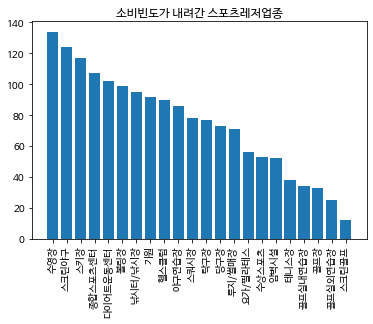

In [24]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)

from matplotlib import rc

index=down_count_duple.index
count=down_count_duple.values
plt.rc('font',family='NanumBarunGothic')
plt.bar(index,count)
plt.xticks(rotation=90)
plt.title('소비빈도가 내려간 스포츠레저업종')
plt.show

In [25]:
down_count_duple.values

array([134, 124, 117, 107, 102,  99,  95,  92,  90,  86,  78,  77,  73,
        71,  56,  53,  52,  38,  34,  33,  25,  12])

<function matplotlib.pyplot.show>

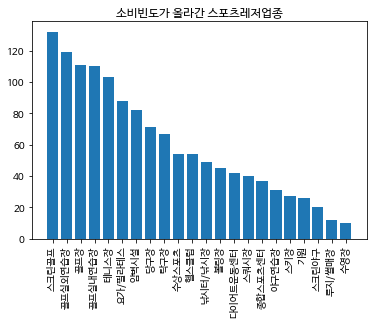

In [26]:
index=up_count_duple.index
count=up_count_duple.values
plt.rc('font',family='NanumBarunGothic')
plt.bar(index,count)
plt.xticks(rotation=90)
plt.title('소비빈도가 올라간 스포츠레저업종')
plt.show

In [27]:
up

,month,type,gender,age_01,age_02,ratio_last_year
0,1,골프실내연습장,남,10대이하,10대이하,329.155313
1,1,골프실내연습장,남,20대,20-24세,124.774084
2,1,골프실내연습장,남,20대,25-29세,114.546336
3,1,골프실내연습장,남,30대,30-34세,122.486969
4,1,골프실내연습장,남,30대,35-39세,108.206543
...,...,...,...,...,...,...
3133,6,헬스클럽,남,30대,30-34세,122.007647
3142,6,헬스클럽,여,10대이하,10대이하,109.125644
3143,6,헬스클럽,여,20대,20-24세,134.852625
3144,6,헬스클럽,여,20대,25-29세,132.228509


In [28]:
up_month=up['month'].value_counts()
up_month

1    320
5    273
6    240
2    209
4    187
3    101
Name: month, dtype: int64

In [29]:
data_alter_columns

,month,type,gender,age_01,age_02,ratio_last_year
0,1,골프실내연습장,남,10대이하,10대이하,329.155313
1,1,골프실내연습장,남,20대,20-24세,124.774084
2,1,골프실내연습장,남,20대,25-29세,114.546336
3,1,골프실내연습장,남,30대,30-34세,122.486969
4,1,골프실내연습장,남,30대,35-39세,108.206543
...,...,...,...,...,...,...
3149,6,헬스클럽,여,50대,50-54세,84.913528
3150,6,헬스클럽,여,50대,55-59세,83.911913
3151,6,헬스클럽,여,60대,60-64세,65.421147
3152,6,헬스클럽,여,60대,65-69세,65.086185


In [30]:
data_alter_columns

,month,type,gender,age_01,age_02,ratio_last_year
0,1,골프실내연습장,남,10대이하,10대이하,329.155313
1,1,골프실내연습장,남,20대,20-24세,124.774084
2,1,골프실내연습장,남,20대,25-29세,114.546336
3,1,골프실내연습장,남,30대,30-34세,122.486969
4,1,골프실내연습장,남,30대,35-39세,108.206543
...,...,...,...,...,...,...
3149,6,헬스클럽,여,50대,50-54세,84.913528
3150,6,헬스클럽,여,50대,55-59세,83.911913
3151,6,헬스클럽,여,60대,60-64세,65.421147
3152,6,헬스클럽,여,60대,65-69세,65.086185


In [31]:
month=[]
for i in range(1,7):
  mon=data_alter_columns[data_alter_columns.month==i]
  month.append(mon[mon.ratio_last_year>=100])

In [32]:
month[2]

,month,type,gender,age_01,age_02,ratio_last_year
1056,3,골프실내연습장,남,20대,25-29세,151.503838
1057,3,골프실내연습장,남,30대,30-34세,223.702412
1060,3,골프실내연습장,남,40대,45-49세,106.018773
1061,3,골프실내연습장,남,50대,50-54세,101.408718
1062,3,골프실내연습장,남,50대,55-59세,142.891714
...,...,...,...,...,...,...
1537,3,테니스장,남,50대,55-59세,166.569767
1538,3,테니스장,남,60대,60-64세,329.600977
1539,3,테니스장,남,60대,65-69세,238.502879
1543,3,테니스장,여,30대,30-34세,161.813992


In [33]:
month_count_duple=month[0]['type'].value_counts()
month_count_duple

골프실내연습장     24
스크린골프       23
요가/필라테스     22
골프실외연습장     22
볼링장         22
스키장         21
테니스장        20
골프장         19
종합스포츠센터     19
암벽시설        19
헬스클럽        17
탁구장         16
당구장         12
다이어트운동센터    11
수영장         10
기원           9
야구연습장        9
스크린야구        7
스쿼시장         6
루지/썰매장       5
수상스포츠        4
낚시터/낚시장      3
Name: type, dtype: int64

In [34]:
month_count_duple_list=[]

for i in range(0,6):
  month_count_duple_list.append(month[i]['type'].value_counts())

In [35]:
# print(month_count_duple_list[0])
print(month_count_duple_list[5])

스크린골프       23
골프실외연습장     23
골프장         21
골프실내연습장     21
요가/필라테스     19
테니스장        16
암벽시설        15
수상스포츠       14
다이어트운동센터    14
당구장         13
스쿼시장        10
헬스클럽         8
낚시터/낚시장      8
탁구장          8
야구연습장        7
종합스포츠센터      6
스크린야구        4
볼링장          4
기원           3
루지/썰매장       2
스키장          1
Name: type, dtype: int64


<function matplotlib.pyplot.show>

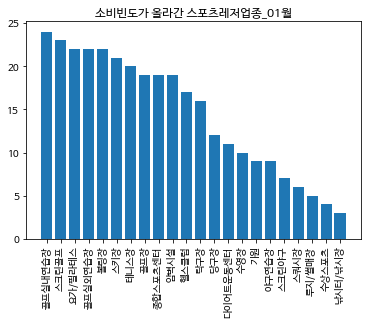

In [36]:
index=month_count_duple_list[0].index
count=month_count_duple_list[0].values
plt.rc('font',family='NanumBarunGothic')
plt.bar(index,count)
plt.xticks(rotation=90)
plt.title('소비빈도가 올라간 스포츠레저업종_01월')
plt.show

# for i in range(0,7):
#   index=month_count_duple_list[i].index
#   count=month_count_duple_list[i].values
#   plt.rc('font',family='NanumBarunGothic')
#   plt.bar(index,count)
#   plt.xticks(rotation=90)
#   plt.title('월별 스포츠레저 소비빈도')
#   plt.show

<function matplotlib.pyplot.show>

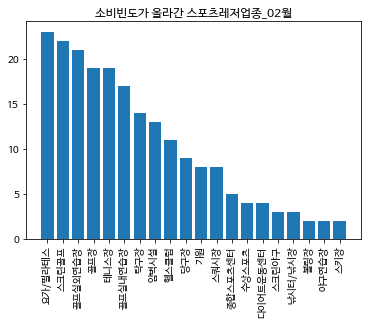

In [43]:
index=month_count_duple_list[1].index
count=month_count_duple_list[1].values
plt.rc('font',family='NanumBarunGothic')
plt.bar(index,count)
plt.xticks(rotation=90)
plt.title('소비빈도가 올라간 스포츠레저업종_02월')
plt.show

<function matplotlib.pyplot.show>

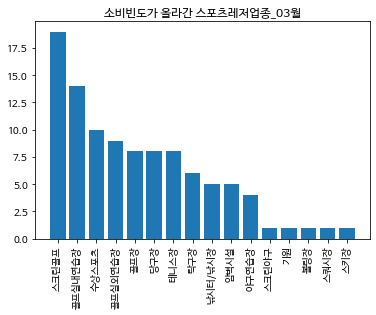

In [38]:
index=month_count_duple_list[2].index
count=month_count_duple_list[2].values
plt.rc('font',family='NanumBarunGothic')
plt.bar(index,count)
plt.xticks(rotation=90)
plt.title('소비빈도가 올라간 스포츠레저업종_03월')
plt.show

<function matplotlib.pyplot.show>

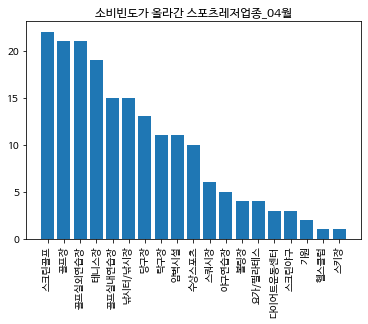

In [40]:
index=month_count_duple_list[3].index
count=month_count_duple_list[3].values
plt.rc('font',family='NanumBarunGothic')
plt.bar(index,count)
plt.xticks(rotation=90)
plt.title('소비빈도가 올라간 스포츠레저업종_04월')
plt.show

<function matplotlib.pyplot.show>

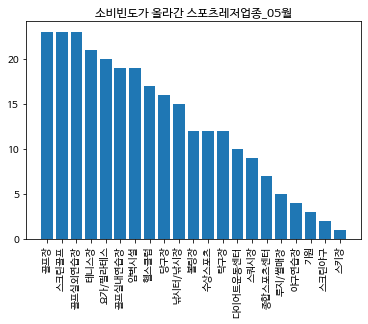

In [41]:
index=month_count_duple_list[4].index
count=month_count_duple_list[4].values
plt.rc('font',family='NanumBarunGothic')
plt.bar(index,count)
plt.xticks(rotation=90)
plt.title('소비빈도가 올라간 스포츠레저업종_05월')
plt.show

<function matplotlib.pyplot.show>

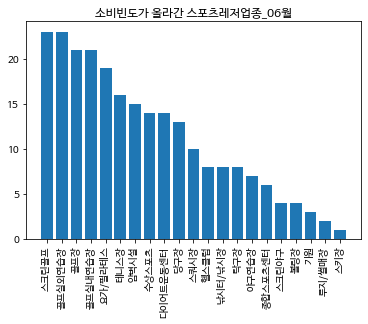

In [42]:
index=month_count_duple_list[5].index
count=month_count_duple_list[5].values
plt.rc('font',family='NanumBarunGothic')
plt.bar(index,count)
plt.xticks(rotation=90)
plt.title('소비빈도가 올라간 스포츠레저업종_06월')
plt.show